# Regularization

####  Its the addition of some new info in the ML model to avoid overfitiing

#### Types-
1. Ridge
2. Lasso
3. Elastic Net

## 1. Ridge Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

data=load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
X=data.data
y=data.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(X_train,y_train)

LinearRegression()

In [4]:
print(L.coef_)
print(L.intercept_)

[  23.45388514 -247.43107084  492.10188174  329.36498638 -970.79784704
  573.54460121  182.41386124  255.9162021   794.21654496   89.32074078]
152.13619339070766


In [5]:
y_pred=L.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188118914964635
RMSE 48.727108291414


In [6]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)
R.fit(X_train,y_train)

Ridge(alpha=100000)

In [7]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.00609765  0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734601  0.00528629]
151.8328793076644


R2 score -0.0004249020401270176
RMSE 70.25956273043168


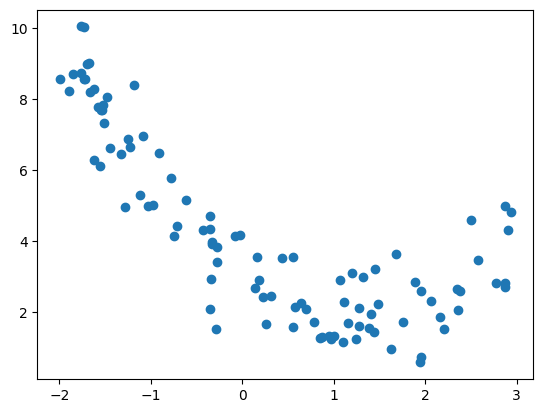

In [8]:
y_pred1=R.predict(X_test)
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

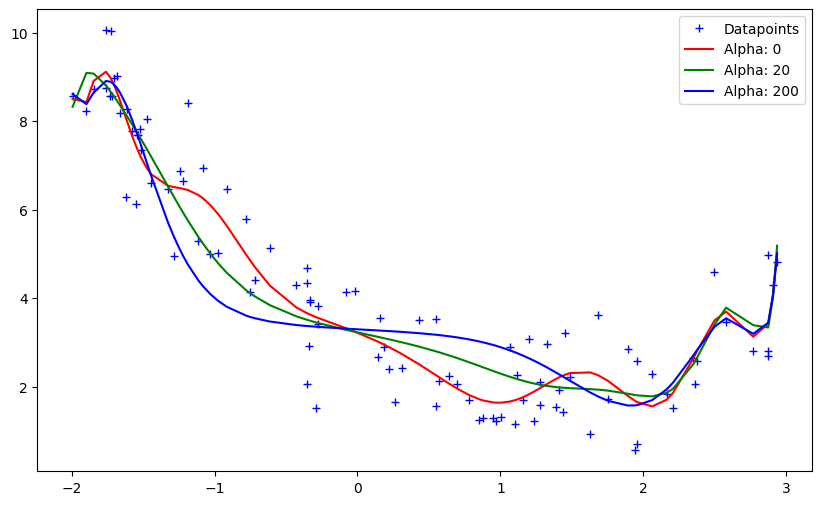

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

_code from scratch_

In [11]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [12]:
reg = MeraRidge(alpha=100)
reg.fit(X,y)

[ 3.01171361  0.69025105  9.40034911  7.07664994  3.39855893  2.78994647
 -6.32817108  6.89983198  9.07068042  6.13091902] [152.13348416 152.13348416 152.13348416 152.13348416 152.13348416
 152.13348416 152.13348416 152.13348416 152.13348416 152.13348416]


_custom ridge regression for n-dimensiona_

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np
X,y = load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1,solver='cholesky')
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [14]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.46930668289209754

In [15]:
print(reg.coef_)
print(reg.intercept_)

[  44.02025512 -241.69666596  452.98163524  332.04993719  -76.34010147
  -68.52063199 -164.98817213  149.9687712   431.61985919   58.51762582]
150.89050209333024


In [16]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [17]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print('R2_score: ', r2_score(y_test,y_pred))
print('slopes:', reg.coef_)
print('intercept', reg.intercept_)

R2_score:  0.46930668289209754
slopes: [  44.02025512 -241.69666596  452.98163524  332.04993719  -76.34010147
  -68.52063199 -164.98817213  149.9687712   431.61985919   58.51762582]
intercept 150.89050209333027


_using greadient descent_

In [18]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np
X,y = load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.3906326641982264
[  49.30281397 -160.08511344  368.8084628   269.85198344   -7.14416016
  -59.07994652 -165.70161596  133.67791644  330.08041548   92.66852419]
[136.95141942]


In [19]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.462389220178535
[  34.62617431 -290.42643559  483.96594581  367.96559729 -852.21640464
  498.74459944  183.78210203  276.57704126  757.34559544   36.95860457]
151.10416921893867


In [20]:
class MeraRidgeGD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [21]:
reg = MeraRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.47379622696725343
[  46.65040212 -221.37723801  452.11770407  325.54645024  -29.09573382
  -96.47613436 -190.90029664  146.3286965   400.80754967   95.08979987]
150.869724427339


#### key understanding

In [22]:
# <!-- 1. How are coefficients affected? -->
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
data = load_diabetes()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

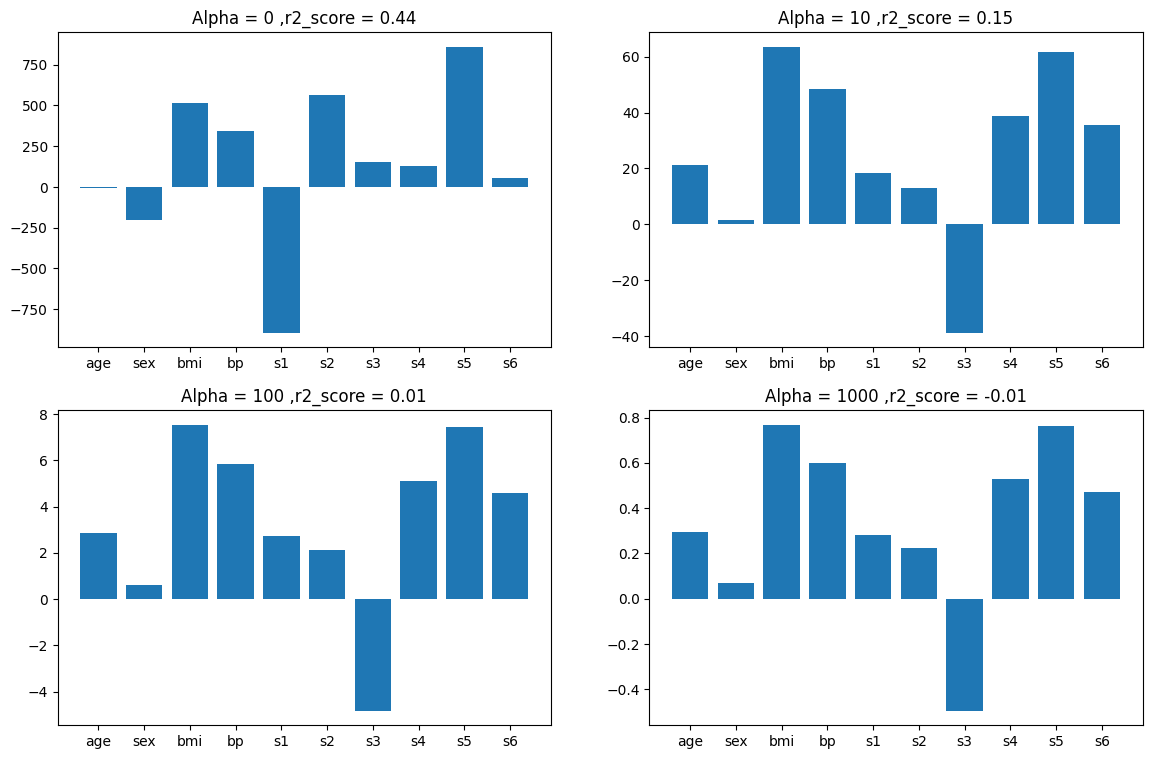

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

In [24]:
# 2. Higher Coefficients are affected more
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
input_array = np.array(coefs)
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                   
0.0000      -9.160885 -205.462260  516.684624  340.627341 -895.543609   
0.0001      -9.118336 -205.337133  516.880570  340.556792 -883.415291   
0.0010      -8.763583 -204.321125  518.371729  339.975385 -787.690766   
0.0100      -6.401088 -198.669767  522.048548  336.348363 -383.709187   
0.1000       6.642753 -172.242166  485.523872  314.682122  -72.939323   
1.0000      42.242217  -57.305508  282.170831  198.061386   14.363544   
10.0000     21.174004    1.659796   63.659772   48.493240   18.421492   
100.0000     2.858979    0.629452    7.540604    5.849997    2.710879   
1000.0000    0.295726    0.069290    0.769004    0.597829    0.282900   
10000.0000   0.029674    0.006995    0.077054    0.059915    0.028412   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.214533  153.884786  126.734316  861.121400  52.419828  
0.0001      551.553259  148.578680  125.355917  856.480254  52.467627  
0.0010      475.274718  106.786540  114.632063  819.739542  52.872100  
0.0100      152.663678  -66.060583   75.611090  659.869402  55.828128  
0.1000      -80.590053 -174.466515   83.616653  484.363285  73.584154  
1.0000      -22.551274 -136.930053  102.023193  260.104308  98.552274  
10.0000      12.875448  -38.915435   38.842464   61.612405  35.505355  
100.0000      2.142134   -4.834047    5.108223    7.448466   4.576129  
1000.0000     0.225936   -0.495607    0.527031    0.761497   0.471029  
10000.0000    0.022715   -0.049686    0.052870    0.076321   0.047241

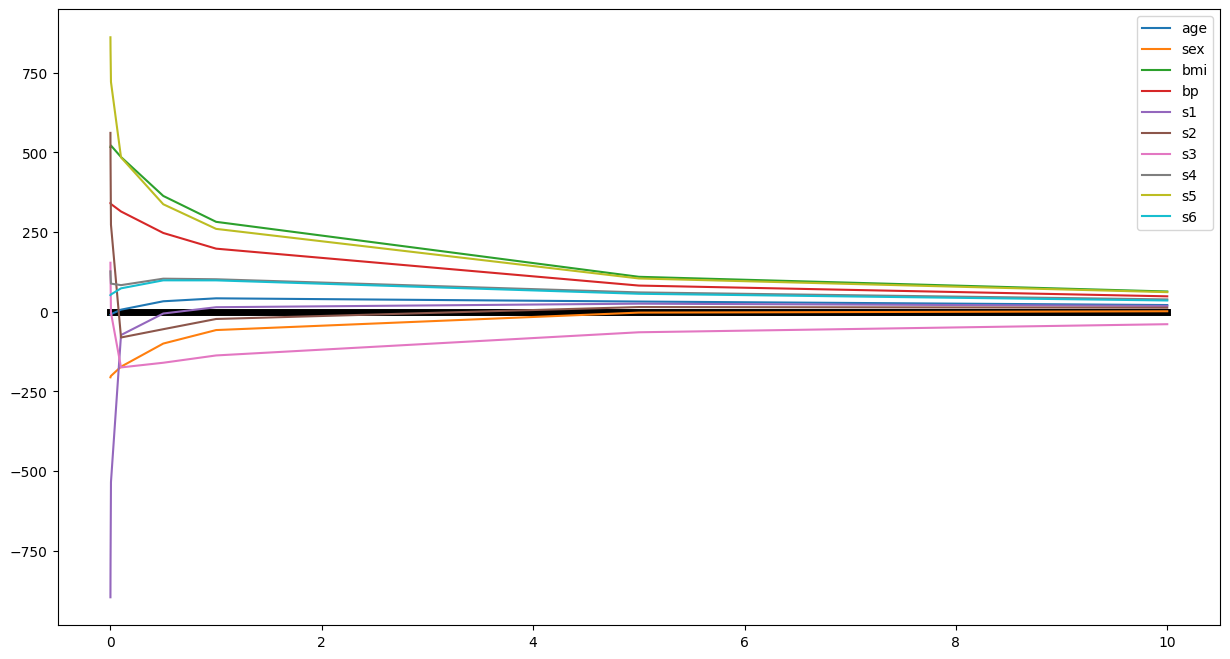

In [25]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
input_array = np.array(coefs).T
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

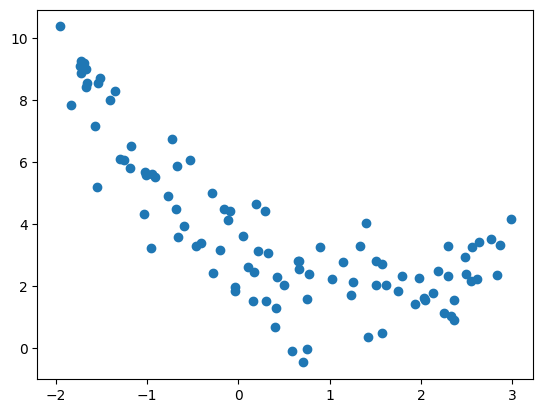

In [28]:
# 3. Impact on Bias and Variance
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)
    
    


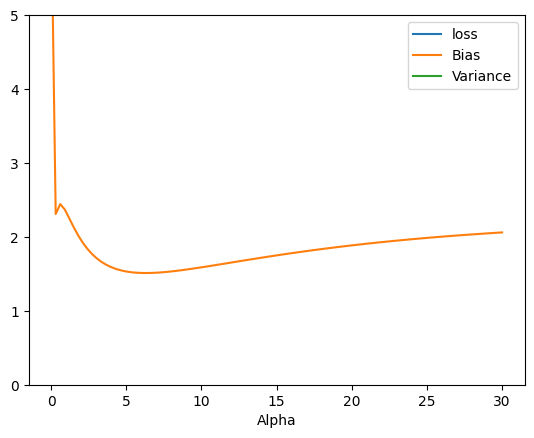

In [31]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

[27.82809103]
-2.29474455867698


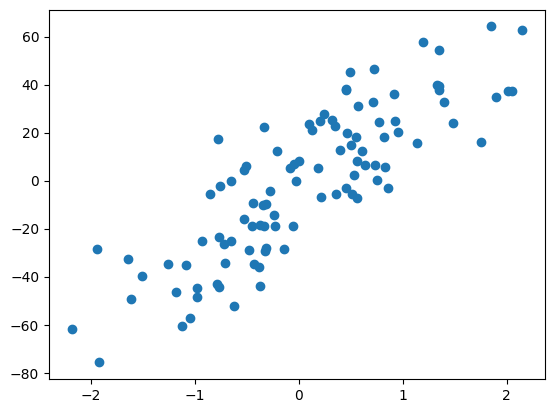

In [32]:
# 4. Effect of Regularization on Loss Function
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

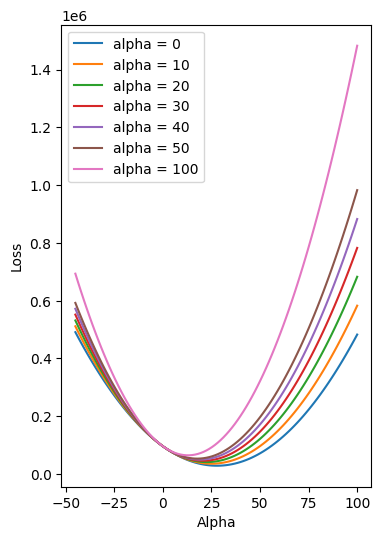

In [33]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m
def predict(m):
    return m*X - 2.29
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

## 2. Lasso Regression

[28.99977985]
-3.868201114991245


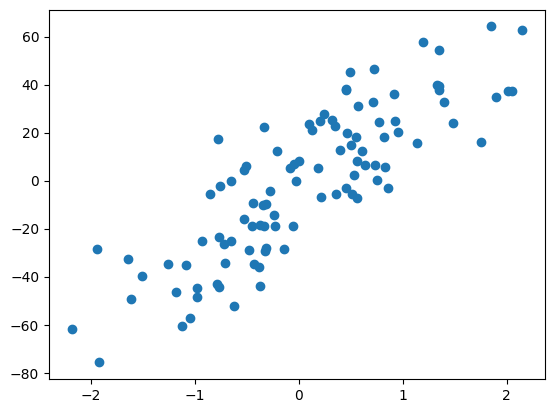

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+04, tolerance: 8.196e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge

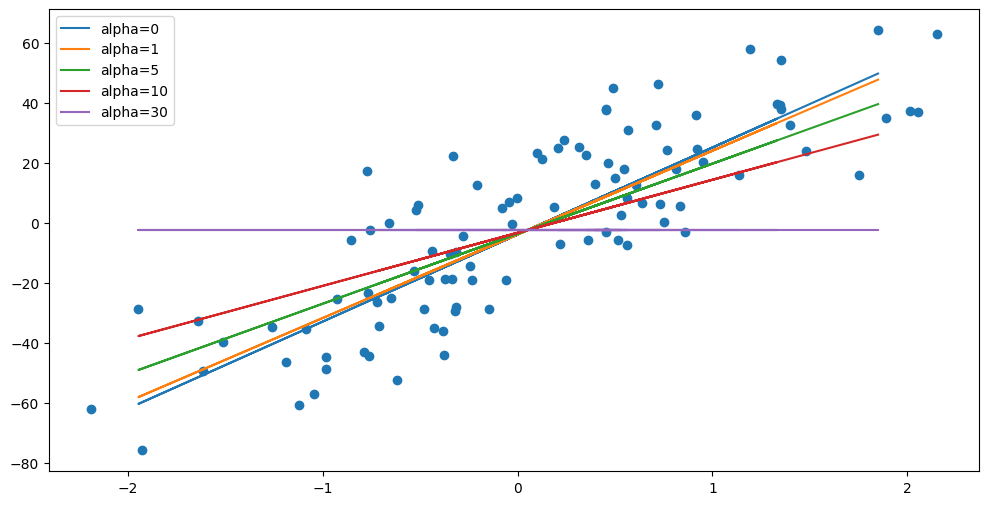

In [35]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+01, tolerance: 6.558e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted

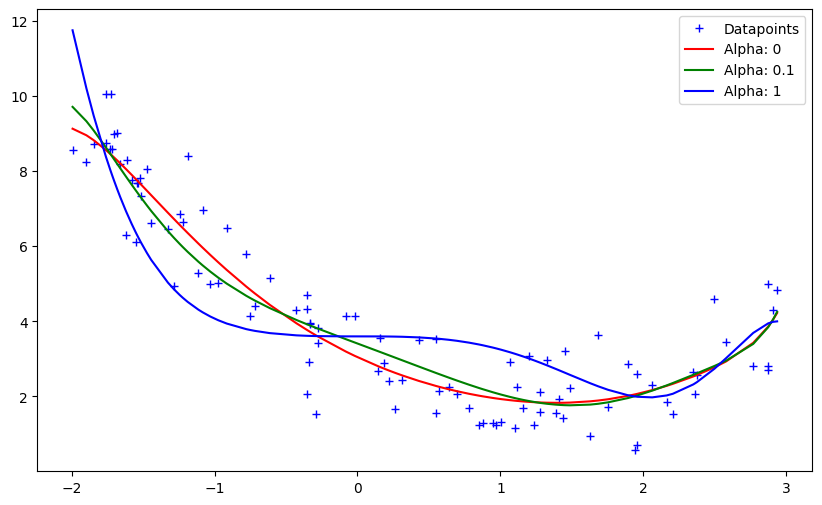

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

_points to remember_

In [38]:
# 1. How are coefficients affected?
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

In [39]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

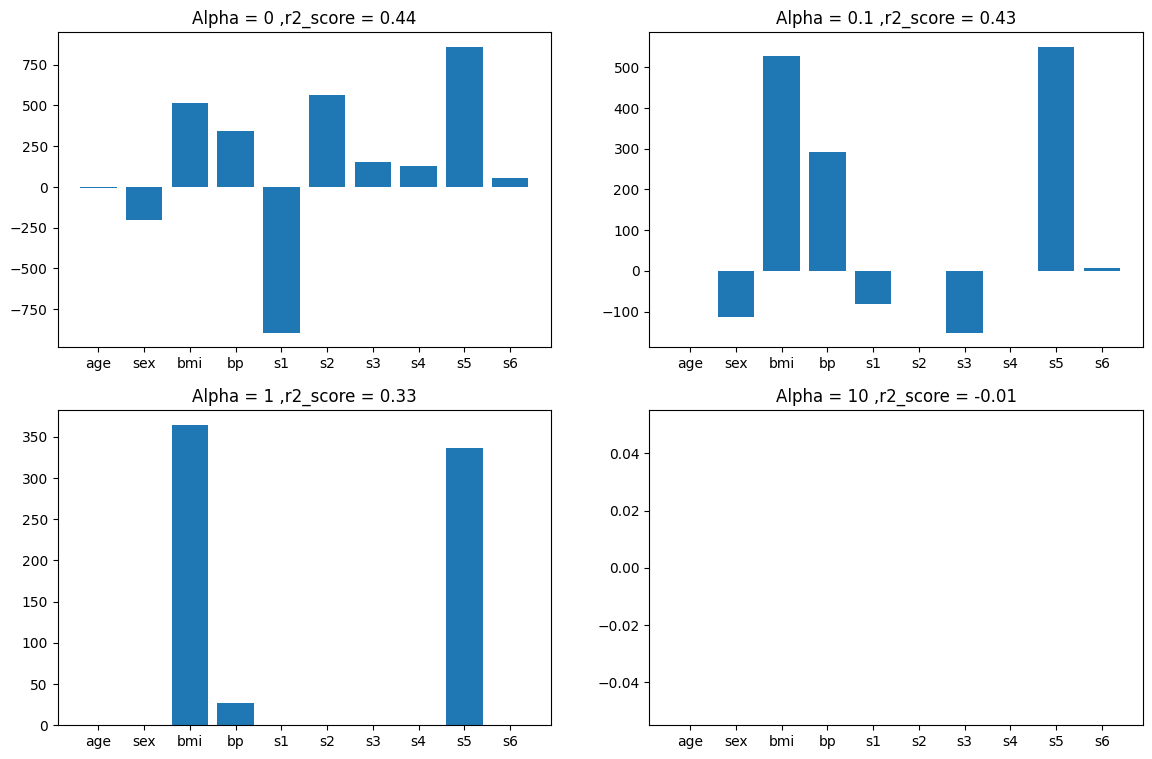

In [40]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

In [41]:
# 2. Higher Coefficients are affected more
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge

In [42]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                  
0.0000     -9.160885 -205.462260  516.684624  340.627341 -895.543596   
0.0001     -9.071288 -205.337332  516.780313  340.539730 -888.652320   
0.0010     -8.264924 -204.213177  517.641106  339.751339 -826.653342   
0.0100     -1.361404 -192.944226  526.348511  332.649058 -430.205495   
0.1000      0.000000 -113.976046  526.737112  292.635423  -82.691928   
1.0000      0.000000    0.000000  363.882636   27.278420    0.000000   
10.0000     0.000000    0.000000    0.000000    0.000000    0.000000   
100.0000    0.000000    0.000000    0.000000    0.000000    0.000000   
1000.0000   0.000000    0.000000    0.000000    0.000000    0.000000   
10000.0000  0.000000    0.000000    0.000000    0.000000    0.000000   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.214523  153.884780  126.734314  861.121395  52.419828  
0.0001      555.952271  150.585260  125.453044  858.639860  52.379002  
0.0010      508.609613  120.899583  113.924518  836.314382  52.011583  
0.0100      191.277876  -44.048113   68.990747  688.384976  47.939528  
0.1000       -0.000000 -152.691332    0.000000  551.077200   7.169852  
1.0000        0.000000   -0.000000    0.000000  336.135971   0.000000  
10.0000       0.000000   -0.000000    0.000000    0.000000   0.000000  
100.0000      0.000000   -0.000000    0.000000    0.000000   0.000000  
1000.0000     0.000000   -0.000000    0.000000    0.000000   0.000000  
10000.0000    0.000000   -0.000000    0.000000    0.000000   0.000000

In [43]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

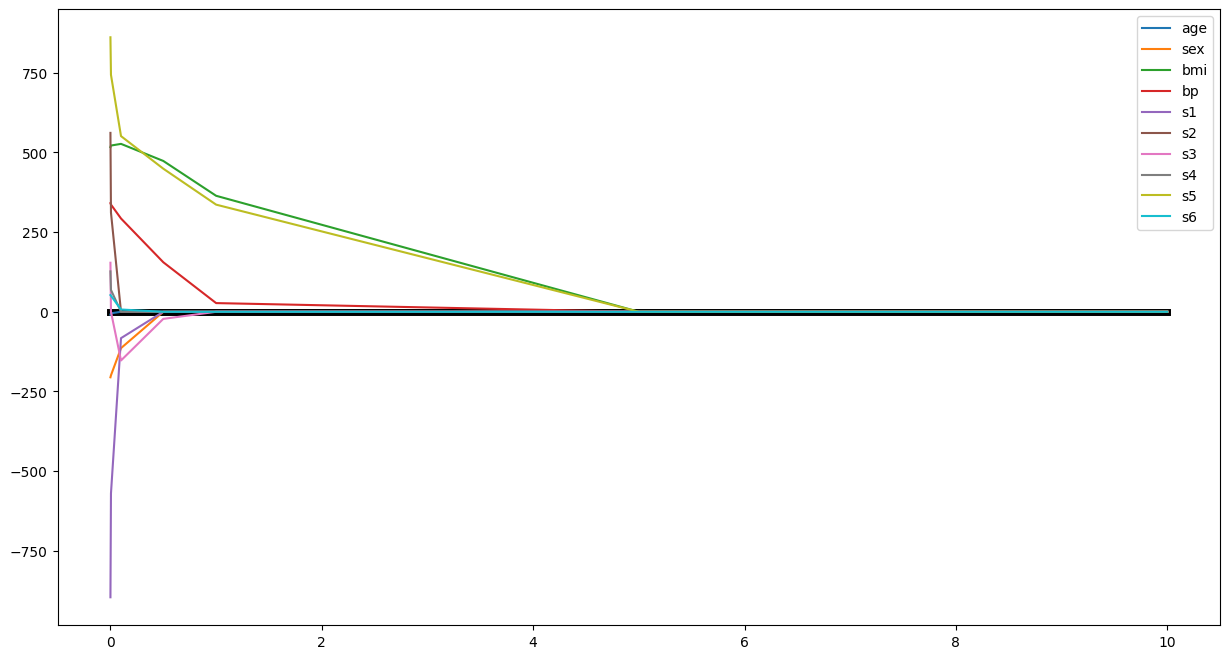

In [44]:

input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\mlxtend\evaluate\bias_variance_decomp.py:130: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  pred = estimator.fit(X_boot, y_boot, **fit_params).predict(X_test)
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+04, tolerance: 9.519e+00 Linear regression models with null weight for the l1 regularization t

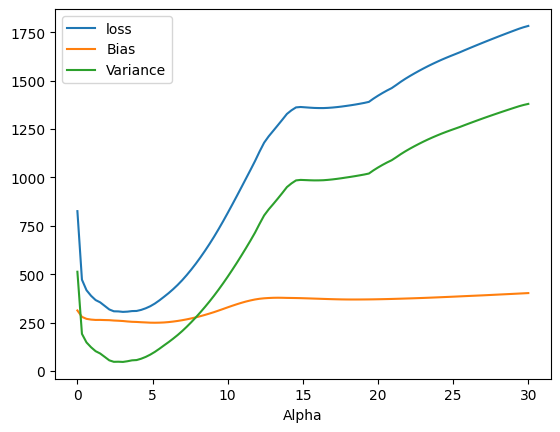

In [46]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.legend()

[27.82809103]
-2.29474455867698


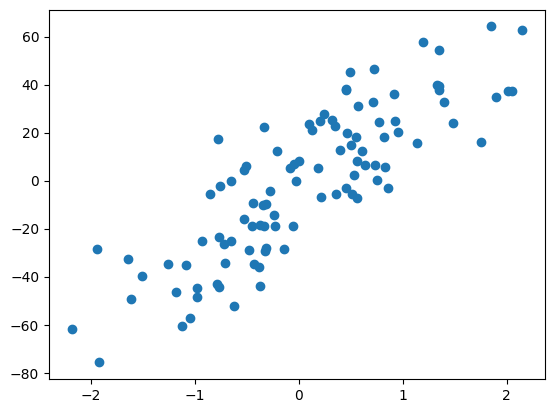

In [47]:
# 4. Effect of Regularization on Loss Function
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

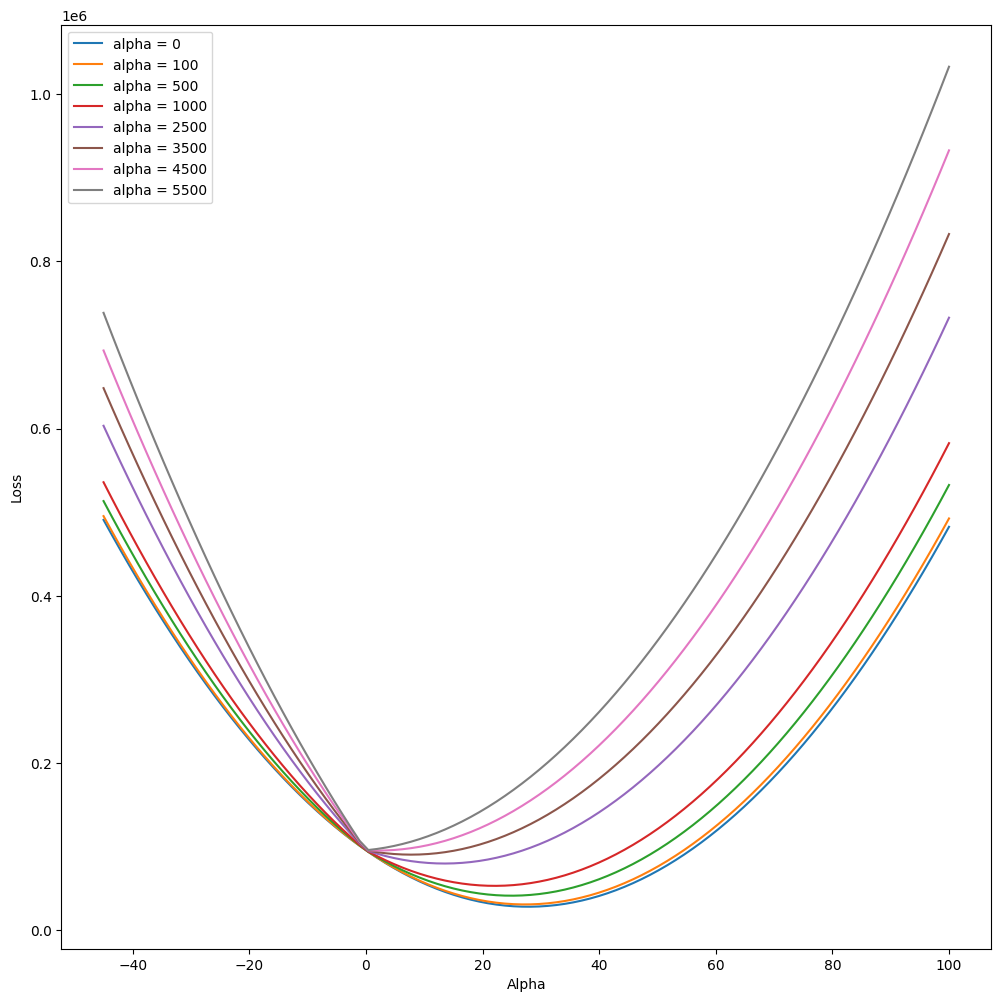

In [50]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)
def predict(m):
    return m*X - 2.29
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

##  3. ElastiNet REgression

In [51]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X,y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024644

In [52]:
# Ridge 
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4519973816947851

In [53]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4411227990495633

In [54]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4531493801165679